In [59]:
import warnings 
warnings.filterwarnings("ignore") 

# EDA on Haberman's Data set

## Haberman's Survival Data set

## Reference:

http://archive.ics.uci.edu/ml/datasets/haberman's+survival

## Data Set Information:
    

The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's
Billings Hospital on the survival of patients who had undergone surgery for breast cancer.


 ## Attribute Information:

1. Age of patient at time of operation (numerical) 
2. Patient's year of operation (year - 1900, numerical) 
3. Number of positive axillary nodes detected (numerical) 
4. Survival status (class attribute) 
 1.= the patient survived 5 years or longer 
 2. = the patient died within 5 year

## Objective : 

To classify whether the patient will survive 5 years or more after the operation based on age , year of operation and the number of positive axillary nodes.

In [60]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np


In [61]:
cancer =pd.read_csv("haberman.csv")
print(cancer.shape)

(306, 4)


__Number of dataset and features :306,4__

In [62]:
print (cancer.columns)

Index(['age', 'year', 'nodes', 'status'], dtype='object')


__name of the columns or features as Age,Year,Nodes,Status.__ 

### Number of Data Points of a status feature:

In [63]:
print (cancer.head())
cancer["status"].value_counts()

   age  year  nodes  status
0   30    64      1       1
1   30    62      3       1
2   30    65      0       1
3   31    59      2       1
4   31    65      4       1


1    225
2     81
Name: status, dtype: int64

In [64]:
cancer["status"].value_counts(normalize=True)*100

1    73.529412
2    26.470588
Name: status, dtype: float64

### Observations:

Percentage of Patients survived and died accordring to the status feature where Status1 =survived and Status2 = Died.

- Survived = 75.52%
- Died     = 26.47%

In [65]:
survived=cancer.loc[cancer['status'] == 1]
died=cancer.loc[cancer['status'] == 2]
print(survived.describe())
print(died.describe())

              age        year       nodes  status
count  225.000000  225.000000  225.000000   225.0
mean    52.017778   62.862222    2.791111     1.0
std     11.012154    3.222915    5.870318     0.0
min     30.000000   58.000000    0.000000     1.0
25%     43.000000   60.000000    0.000000     1.0
50%     52.000000   63.000000    0.000000     1.0
75%     60.000000   66.000000    3.000000     1.0
max     77.000000   69.000000   46.000000     1.0
             age       year      nodes  status
count  81.000000  81.000000  81.000000    81.0
mean   53.679012  62.827160   7.456790     2.0
std    10.167137   3.342118   9.185654     0.0
min    34.000000  58.000000   0.000000     2.0
25%    46.000000  59.000000   1.000000     2.0
50%    53.000000  63.000000   4.000000     2.0
75%    61.000000  65.000000  11.000000     2.0
max    83.000000  69.000000  52.000000     2.0


### Observations:

1. based on the survived data points 75% of the women had 3.00 positive auxilary nodes but also survived cancer.
2. also based on died data points 75% of the women had 11.00 posituve auxilary nodes which means lesser the positive auxilary  nodes higher the chances of survival.
3. The auxilary Nodes cannot justify for the Survival of the patient as there were patients who had min (0) nodes yet died.

## Univariate Analysis 

### 1. Feature 1 (Age)

###   1.1 Histogram with CDF





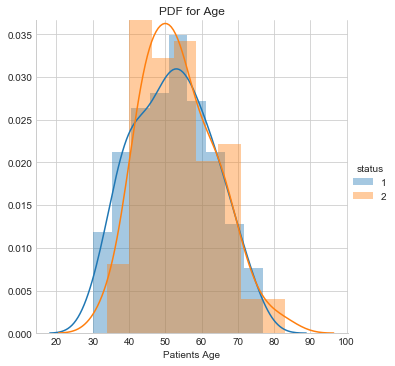

In [81]:
sn.FacetGrid(cancer,hue="status",size=5) \
  .map(sn.distplot,"age") \
  .add_legend();
plt.title('PDF for Age')
plt.xlabel('Patients Age')
plt.show();


###   1.2 CDF

[ 0.05333333  0.10666667  0.12444444  0.09333333  0.16444444  0.16444444
  0.09333333  0.11111111  0.06222222  0.02666667]
[ 30.   34.7  39.4  44.1  48.8  53.5  58.2  62.9  67.6  72.3  77. ]
[ 0.03703704  0.12345679  0.19753086  0.19753086  0.13580247  0.12345679
  0.09876543  0.04938272  0.02469136  0.01234568]
[ 34.   38.9  43.8  48.7  53.6  58.5  63.4  68.3  73.2  78.1  83. ]


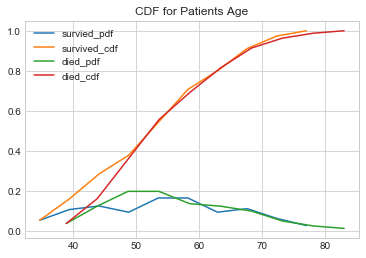

In [67]:
counts, bin_edges = np.histogram(survived["age"], bins=10, density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
counts, bin_edges = np.histogram(died["age"], bins=10, density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.legend(['survied_pdf','survived_cdf','died_pdf','died_cdf'])
plt.title('CDF for Patients Age')

plt.show();

## Observations:

Overlapping of Survived and Died class (age) points cannot justify the differnce in PDF and CDF.

### 1.3 Box-Plot

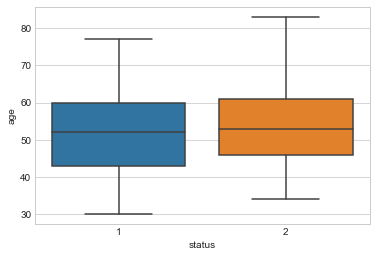

In [68]:
sn.boxplot(x='status',y='age',data=cancer)
plt.show()

###  1.4 Violin-Plot

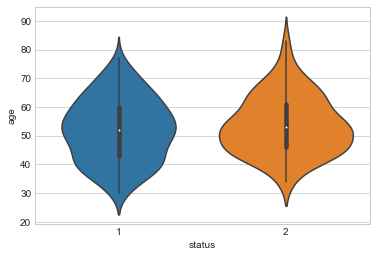

In [69]:
sn.violinplot(x='status',y='age',data=cancer,size =10)
plt.show()

## Observations:

- From box plots and violin plots, we can say through whiskers that number of patients who are dead have age between 46-62, and the patients who survived have age between 42-60.

### 2.Feature 2 (Year)

### 2.1 Histogram with CDF

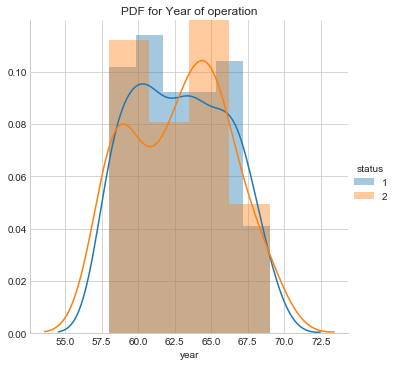

In [70]:
sn.FacetGrid(cancer,hue="status",size=5) \
  .map(sn.distplot,"year") \
  .add_legend();
plt.title('PDF for Year of operation')
plt.show();

### 2.2 CDF

[ 0.18666667  0.10666667  0.10222222  0.07111111  0.09777778  0.10222222
  0.06666667  0.09777778  0.09333333  0.07555556]
[ 58.   59.1  60.2  61.3  62.4  63.5  64.6  65.7  66.8  67.9  69. ]
[ 0.25925926  0.04938272  0.03703704  0.08641975  0.09876543  0.09876543
  0.16049383  0.07407407  0.04938272  0.08641975]
[ 58.   59.1  60.2  61.3  62.4  63.5  64.6  65.7  66.8  67.9  69. ]


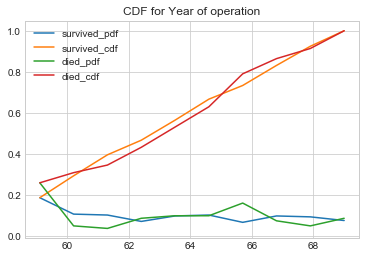

In [71]:
counts, bin_edges = np.histogram(survived["year"], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
counts, bin_edges = np.histogram(died["year"], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.legend(['survived_pdf','survived_cdf','died_pdf','died_cdf'])
plt.title('CDF for Year of operation')

plt.show();

## Observations:

Overlapping of Survived and Died class (year) points cannot justify the differnce in PDF and CDF

### 2.3 Box-Plot

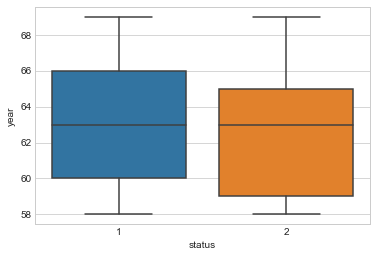

In [72]:
sn.boxplot(x='status',y='year',data=cancer)
plt.show()

### 2.4 Violin-Plot

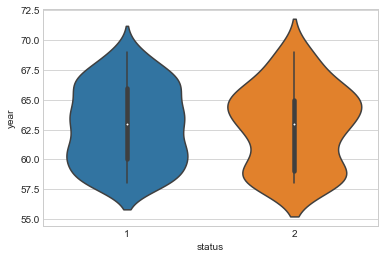

In [73]:
sn.violinplot(x='status',y='year',data=cancer,size =10)
plt.show()

### 3.Feature 3 (Nodes)

### 3.1 Histogram with CDF

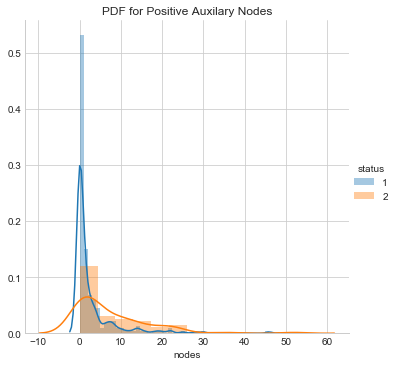

In [74]:
sn.FacetGrid(cancer,hue="status",size=5) \
  .map(sn.distplot,"nodes") \
  .add_legend();
plt.title('PDF for Positive Auxilary Nodes')
plt.show();

### 3.2 CDF

[ 0.83555556  0.08        0.02222222  0.02666667  0.01777778  0.00444444
  0.00888889  0.          0.          0.00444444]
[  0.    4.6   9.2  13.8  18.4  23.   27.6  32.2  36.8  41.4  46. ]
[ 0.56790123  0.14814815  0.13580247  0.04938272  0.07407407  0.
  0.01234568  0.          0.          0.01234568]
[  0.    5.2  10.4  15.6  20.8  26.   31.2  36.4  41.6  46.8  52. ]


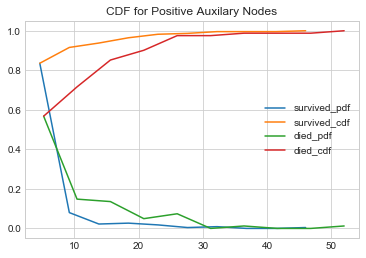

In [75]:
counts, bin_edges = np.histogram(survived["nodes"], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
counts, bin_edges = np.histogram(died["nodes"], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.legend(['survived_pdf','survived_cdf','died_pdf','died_cdf'])
plt.title('CDF for Positive Auxilary Nodes')

plt.show();

## Observations:

1. Overlapping exists but can be differentiated as pdf shows less overlapping.
2. There were patients with no positive auxilary nodes yet died ,therefore this feature cannot guarantee the survival of the patient.


### 3.3 Box-Plot

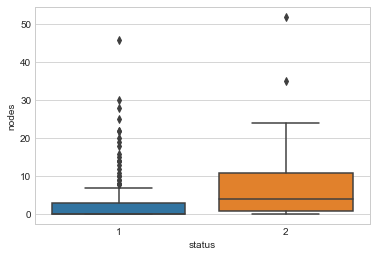

In [76]:
sn.boxplot(x='status',y='nodes',data=cancer)
plt.show()

### 3.4 Violin-Plot

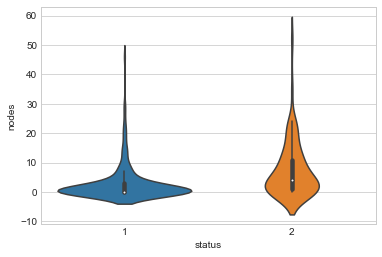

In [77]:
sn.violinplot(x='status',y='nodes',data=cancer,size =10)
plt.show()

## Observations:

1. The number of positive lymph nodes of the survivors is ranges  from 0 to 5.
2. Almost 80% of the patients have less than or equal to 5 positive nodes survived more than 5 years.


# Bivariate Analysis (Pair Plots) 

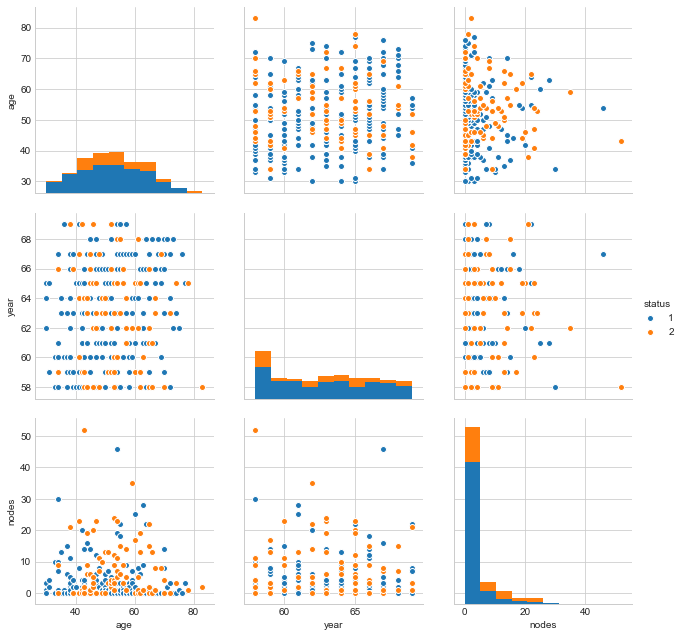

In [78]:
plt.close();
sn.set_style("whitegrid");
sn.pairplot(cancer, hue="status",vars =['age','year','nodes'] ,size=3);
plt.show()

## Observations:

1. Overlapping in the pair plots at all the features.
2. The Diagonal graphs are the PDF's of each other.
3. Cannot easily differentiate between the two features for easy Classification.The features provide cannot justify the Result.

## Contour Plots

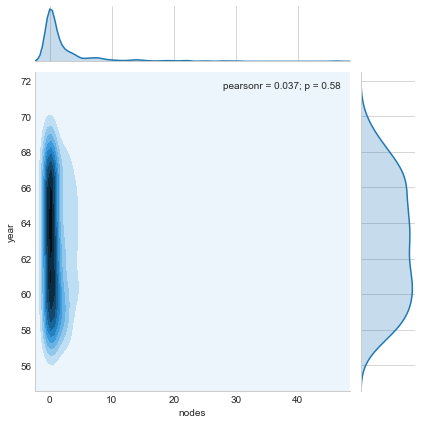

In [79]:
sn.jointplot(x="nodes", y="year", data=survived, kind="kde");
plt.show();

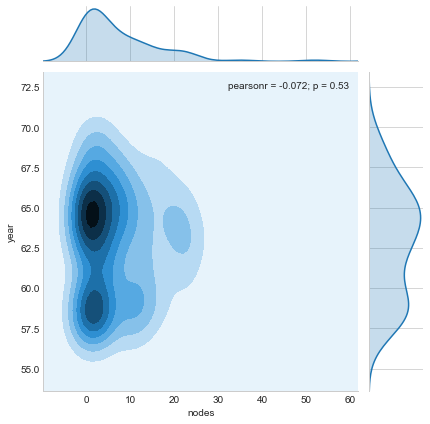

In [80]:
sn.jointplot(x="nodes", y="year", data=died, kind="kde");
plt.show();

## Observations:

There is no relationship beteween the year of operation and Positive Auxilary nodes.

# Final Conclusion:


1. The number of positive axillary nodes increase the chances of survival of patient decrease at the same time having zero postivie axillary nodes doesn't guarentee survival as there where patients with zero positive axillary nodes couldn't survive 5 years from the time of operation.

2. Patient's age and Year of operation features did not differitaiate much on survival of patients.

3. The features provided are not enough for the significance of Cancer.
